In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [22]:
# UCI ML database - energy efficiency
import urllib2
socket = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
UCI_energy=pd.read_excel(socket)

#^ if you don't have urllib2 working you can download the csv from here: 
#     http://prg.washington.edu/DIRECTfiles/ENB2012_data.csv
# X1	Relative Compactness 
# X2	Surface Area 
# X3	Wall Area 
# X4	Roof Area 
# X5	Overall Height 
# X6	Orientation 
# X7	Glazing Area 
# X8	Glazing Area Distribution 
# y1	Heating Load 
# y2	Cooling Load

In [23]:
UCI_energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [82]:
train,test=train_test_split(UCI_energy,test_size=0.2,random_state=1010)

## Basic decision tree

In [83]:
from sklearn import tree

In [100]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(train[['X1','X2','X3','X4','X5','X6','X7','X8']],train.Y1)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

### Tree visualization and looking at the parity plot for individual instances 

In [101]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'Y1', u'Y2'], dtype='object')

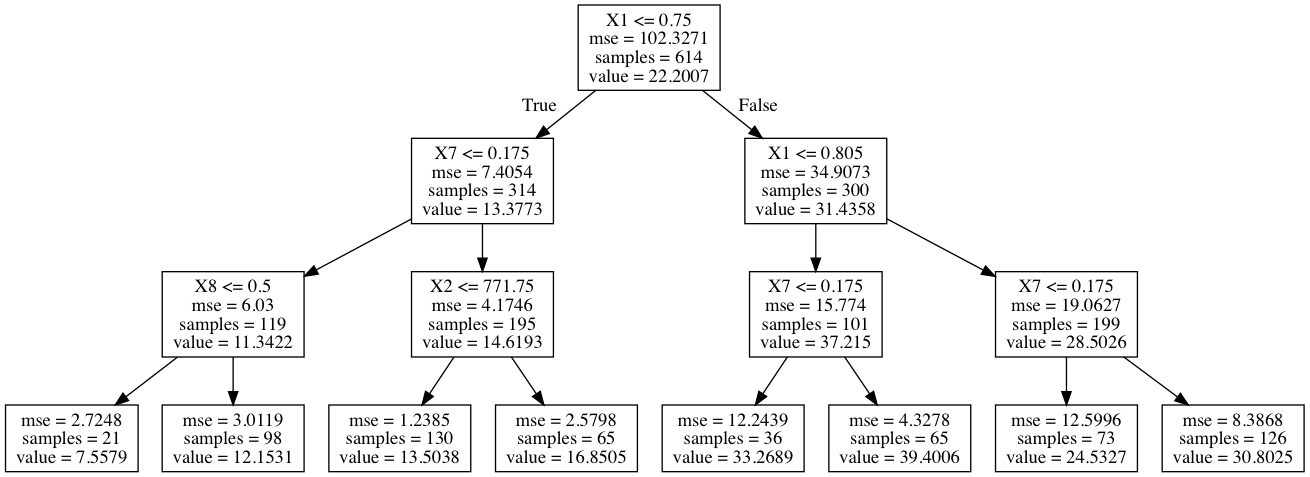

In [125]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)
    
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=['X1','X2','X3','X4','X5','X6','X7','X8'])
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("basic_tree.pdf") 

from IPython.display import Image  
Image(graph.create_png()) 

('Train error', 2.3938372135928181)
('Test error', 3.167332691241298)


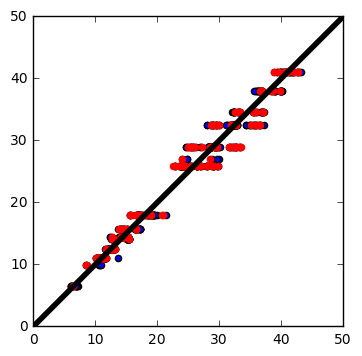

In [98]:
# make predictions on test and train set 
trainpred=DT.predict(train[['X1','X2','X3','X4','X5','X6','X7','X8']])
testpred=DT.predict(test[['X1','X2','X3','X4','X5','X6','X7','X8']])

#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,50]);
plt.ylim([0,50]);
plt.scatter(train.Y1,trainpred)
plt.scatter(test.Y1,testpred,color='r')
plt.plot([0,50],[0,50],lw=4,color='black')

#calculate the test and train error
print("Train error",mean_squared_error(train.Y1,trainpred))
print("Test error",mean_squared_error(test.Y1,testpred))

## Test and training set error as a function of maximum tree depth 

In [88]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(train[['X1','X2','X3','X4','X5','X6','X7','X8']],train.Y1)
    trainerror.append(mean_squared_error(train.Y1,model.predict(
        train[['X1','X2','X3','X4','X5','X6','X7','X8']])))
    testerror.append(mean_squared_error(test.Y1,model.predict(
        test[['X1','X2','X3','X4','X5','X6','X7','X8']])))




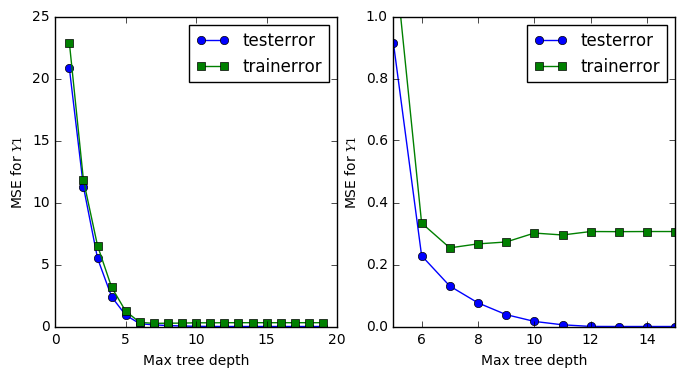

In [89]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $Y1$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((5,15))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $Y1$')